In [1]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, root_mean_squared_error, explained_variance_score
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz, export_text
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import graphviz

In [2]:
#Columns/Features (Wine)
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set (Wine)
wine_r = pd.read_csv("winequality-red.csv", sep=';')
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

#Z-Score Normalization (Wine)
wine_normalized = wine.copy()
for column in DLC:
    wine_normalized[column] = (wine[column] - wine[column].mean()) / wine[column].std()

#Columns/Features (Abalone)
F = ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']
S = 'sex'
R = 'rings'
FS = F + [S]
FR = F + [R]
FSR = FS + [R]

#Loading Data set (Abalone)
abalone = pd.read_csv("abalone.csv", names = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings'])

#Z-Score Normalization (Abalone)
abalone_normalized = abalone[FR].copy()
for column in FR:
    abalone_normalized[column] = (abalone[column] - abalone[column].mean()) / abalone[column].std()

#Columns/Features (Forest Fire)
numbers = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
categorical = ['month', 'day']
target = ['area']
labels = numbers + categorical
not_categorical = numbers + target
all = labels + target

#Loading Data set (Forest Fire)
forestfires = pd.read_csv("forestfires.csv", names = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'], skiprows = [1])

#Z-Score Normalization (Forest Fire)
forestfires_normalized = forestfires[numbers].copy()
for column in numbers:
    forestfires_normalized[column] = (forestfires[column] - forestfires[column].mean()) / forestfires[column].std()

display(wine[DL].describe())
display(abalone[FS].describe())
display(forestfires[numbers])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
2,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
3,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
4,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0
...,...,...,...,...,...,...,...,...,...,...
511,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
512,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
513,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
514,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [3]:
# Create Train/Test Split (Wine)
# classify quality of wine with all features
X = (wine_normalized[DC].values)  #data
y = np.ravel(wine[L]) #labels (quality)

X_raw = (wine[DC].values)  #data

print(f'Data: shape={X.shape}')
print(f'Labels: shape={y.shape}')
ran = 42
train_size = .8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y, train_size=train_size, random_state = ran) 

Data: shape=(6497, 12)
Labels: shape=(6497,)


In [4]:
# Create Train/Test Split (Abalone)
# classify rings of abalone with all features
X_abalone = abalone_normalized[F].values  #data
y_abalone = np.ravel(abalone[R]) #labels (rings)

X_abalone_raw = abalone[F].values  #data

print(f'Data: shape={X_abalone.shape}')
print(f'Labels: shape={y_abalone.shape}')

# Create Train/Test Split (Abalone)
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_abalone, y_abalone, train_size=train_size, random_state = ran) 
X_train_A_raw, X_test_A_raw, y_train_A_raw, y_test_A_raw = train_test_split(X_abalone_raw, y_abalone, train_size=train_size, random_state = ran)


Data: shape=(4177, 7)
Labels: shape=(4177,)


In [5]:
# Create Train/Test Split (Forest Fires)
# classify area of forest fires with all features
X_forest = forestfires_normalized[numbers].values  #data
y_forest = np.ravel(forestfires[target]) #labels (area)

X_forest_raw = forestfires[numbers].values  #data

print(f'Data: shape={X_forest.shape}')
print(f'Labels: shape={y_forest.shape}')

# Create Train/Test Split (Forest Fires)
X_train_F, X_test_F, y_train_F, y_test_F = train_test_split(X_forest, y_forest, train_size=train_size, random_state = ran) 
X_train_F_raw, X_test_F_raw, y_train_F_raw, y_test_F_raw = train_test_split(X_forest_raw, y_forest, train_size=train_size, random_state = ran)


Data: shape=(516, 10)
Labels: shape=(516,)


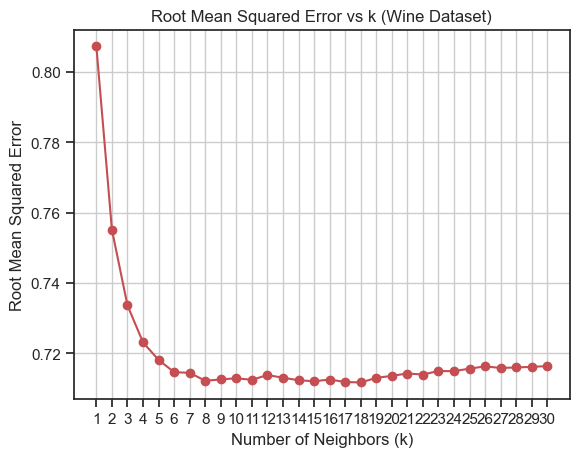

Best k Value: 18
Best RMSE Value: 0.6651407037202648
Variance of RMSE for Best k: 0.0004048407847570013


In [16]:
# Create array to store k values with their mean validation accuracy (Wine)
k_values=range(1,31)
RMSE=[]
RMSE_variance=[]
for k in k_values:
    k_nearest_wine = neighbors.KNeighborsRegressor(n_neighbors=k)
    cross_val_error = cross_val_score(k_nearest_wine, X_train, y_train, scoring='neg_root_mean_squared_error')
    RMSE.append((-1)*cross_val_error.mean())
    RMSE_variance.append(cross_val_error.var())


# Create plot for k_values vs mean squared error (Wine)
plt.plot(k_values, RMSE, marker='o', linestyle='-', color='r')
plt.xticks(k_values)
plt.title('Root Mean Squared Error vs k (Wine Dataset)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Root Mean Squared Error')
plt.grid()
plt.show()

#Find lowest RMSE value
min_rmse = min(RMSE) 
best_k_wine = RMSE.index(min_rmse) + 1

# Root Mean Squared Error after training with best k (Wine)
k_nearest_wine_best=neighbors.KNeighborsRegressor(n_neighbors=best_k_wine)
k_nearest_wine_best.fit(X_train, y_train)
y_pred_wine = k_nearest_wine_best.predict(X_test)
RMSE_wine_best = root_mean_squared_error(y_test, y_pred_wine)
print(f"Best k Value: {best_k_wine}")
print(f"Best RMSE Value: {RMSE_wine_best}")
print(f"Variance of RMSE for Best k: {RMSE_variance[best_k_wine - 1]}")



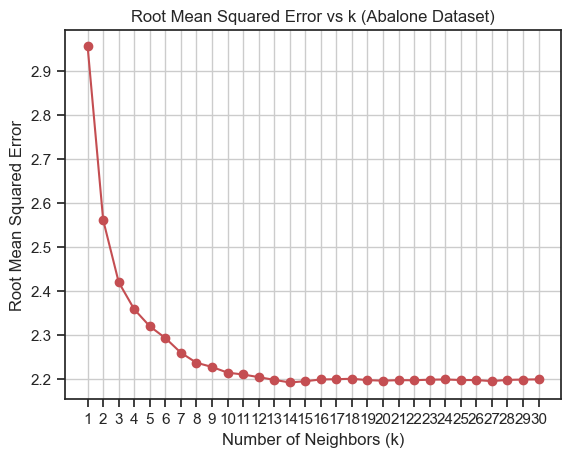

Best k value: 14
Best RMSE Value: 2.2928042274617044
Variance of RMSE for Best k: 0.017277394367422195


In [17]:
# Create array to store k values with their mean validation accuracy (Abalone)
RMSE_A = []
RMSE_variance_A = []
for k in k_values:
    k_nearest_abalone = neighbors.KNeighborsRegressor(n_neighbors=k)
    cross_val_error_A = cross_val_score(k_nearest_abalone, X_train_A, y_train_A, scoring='neg_root_mean_squared_error')
    RMSE_A.append((-1)*cross_val_error_A.mean())
    RMSE_variance_A.append(cross_val_error_A.var())

# Create plot for k_values vs mean squared error (Abalone)
plt.plot(k_values, RMSE_A, marker='o', linestyle='-', color='r')
plt.xticks(k_values)
plt.title('Root Mean Squared Error vs k (Abalone Dataset)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Root Mean Squared Error')
plt.grid()
plt.show()

#Find lowest RMSE value and best k value (Abalone)
min_rmse_A = min(RMSE_A) 
best_k_abalone = RMSE_A.index(min_rmse_A) + 1

# Root Mean Squared Error after training with best k (Abalone)
k_nearest_abalone_best = neighbors.KNeighborsRegressor(n_neighbors=best_k_abalone)
k_nearest_abalone_best.fit(X_train_A, y_train_A)
y_pred_abalone = k_nearest_abalone_best.predict(X_test_A)
RMSE_abalone_best = root_mean_squared_error(y_test_A, y_pred_abalone)
print(f"Best k value: {best_k_abalone}")
print(f"Best RMSE Value: {RMSE_abalone_best}")
print(f"Variance of RMSE for Best k: {RMSE_variance_A[best_k_abalone - 1]}")

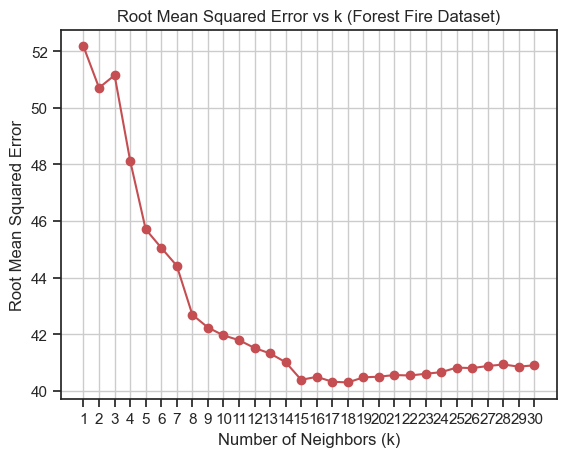

Best k value: 18
Best RMSE Value: 107.92285231907918
Variance of RMSE for Best k: 475.62619983419233


In [18]:
# Create array to store k values with their mean validation accuracy (Forest Fire)
RMSE_F = []
RMSE_variance_F = []
for k in k_values:
    k_nearest_forest = neighbors.KNeighborsRegressor(n_neighbors=k)
    cross_val_error_F = cross_val_score(k_nearest_forest, X_train_F, y_train_F, scoring='neg_root_mean_squared_error')
    RMSE_F.append((-1)*cross_val_error_F.mean())
    RMSE_variance_F.append(cross_val_error_F.var())

# Create plot for k_values vs mean squared error (Forest Fire)
plt.plot(k_values, RMSE_F, marker='o', linestyle='-', color='r')
plt.xticks(k_values)
plt.title('Root Mean Squared Error vs k (Forest Fire Dataset)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Root Mean Squared Error')
plt.grid()
plt.show()

#Find lowest RMSE value and best k value (Abalone)
min_rmse_F = min(RMSE_F) 
best_k_forest = RMSE_F.index(min_rmse_F) + 1

# Root Mean Squared Error after training with best k (Forest Fire)
k_nearest_forest_best = neighbors.KNeighborsRegressor(n_neighbors=best_k_forest)
k_nearest_forest_best.fit(X_train_F, y_train_F)
y_pred_forest = k_nearest_forest_best.predict(X_test_F)
RMSE_forest_best = root_mean_squared_error(y_test_F, y_pred_forest)
print(f"Best k value: {best_k_forest}")
print(f"Best RMSE Value: {RMSE_forest_best}")
print(f"Variance of RMSE for Best k: {RMSE_variance_F[best_k_forest - 1]}")

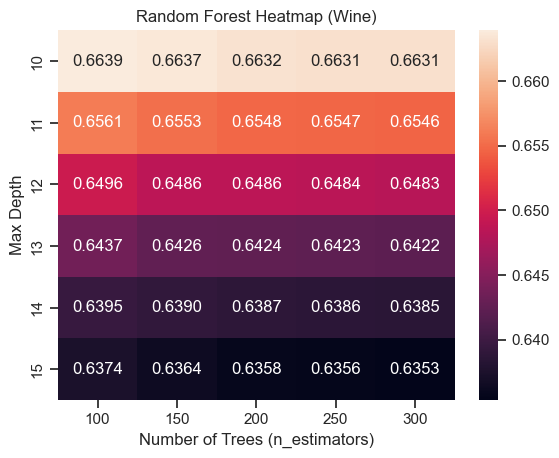

Best parameters: {'max_depth': 15, 'n_estimators': 300}
Best RMSE Value: 0.5717019751364067
Variance of RMSE for Best Parameters: 0.0005057384215170495


In [19]:
# Create random forest (Wine)
random_forest = RandomForestRegressor(random_state=42)
forest_settings = {
    'n_estimators':[100,150,200,250,300],
    'max_depth':[10,11,12,13,14,15]
}
grid_search_random = GridSearchCV(random_forest, forest_settings ,scoring='neg_root_mean_squared_error')
grid_search_random.fit(X_train_raw, y_train_raw)

results= pd.DataFrame(grid_search_random.cv_results_)
results["mean_test_score"] = -results["mean_test_score"]

heatmap = results.pivot(index="param_max_depth", columns="param_n_estimators", values="mean_test_score")
sns.heatmap(heatmap, annot=True, fmt=".4f")

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Max Depth")
plt.title("Random Forest Heatmap (Wine)")
plt.show()

best_params_wine = grid_search_random.best_params_
std_wine = results["std_test_score"][grid_search_random.best_index_]
variance_wine = std_wine**2

random_forest_best = RandomForestRegressor(n_estimators=best_params_wine['n_estimators'], max_depth=best_params_wine['max_depth'],random_state=42)
random_forest_best.fit(X_train_raw, y_train_raw)
y_pred_wine = random_forest_best.predict(X_test_raw)
RMSE_wine = root_mean_squared_error(y_test_raw, y_pred_wine)

print(f"Best parameters: {best_params_wine}")
print(f"Best RMSE Value: {RMSE_wine}")
print(f"Variance of RMSE for Best Parameters: {variance_wine}")

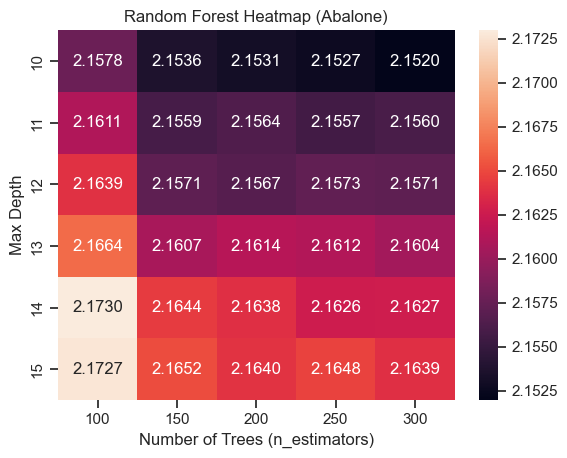

Best parameters: {'max_depth': 10, 'n_estimators': 300}
Best RMSE Value: 2.2383496671466125
Variance of RMSE for Best Parameters: 0.011227725907137375


In [20]:
# Create random forest (Abalone)
random_forest_A = RandomForestRegressor(random_state=42)
forest_settings_A = {
    'n_estimators':[100,150,200,250,300],
    'max_depth':[10,11,12,13,14,15]
}
grid_search_random_A = GridSearchCV(random_forest_A, forest_settings_A ,scoring='neg_root_mean_squared_error')
grid_search_random_A.fit(X_train_A_raw, y_train_A_raw)

results_A= pd.DataFrame(grid_search_random_A.cv_results_)
results_A["mean_test_score"] = -results_A["mean_test_score"]

heatmap_A = results_A.pivot(index="param_max_depth", columns="param_n_estimators", values="mean_test_score")
sns.heatmap(heatmap_A, annot=True, fmt=".4f")

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Max Depth")
plt.title("Random Forest Heatmap (Abalone)")
plt.show()

best_params_abalone = grid_search_random_A.best_params_
std_abalone = results_A["std_test_score"][grid_search_random_A.best_index_]
variance_abalone = std_abalone**2

random_forest_best_A = RandomForestRegressor(n_estimators=best_params_abalone['n_estimators'], max_depth=best_params_abalone['max_depth'],random_state=42)
random_forest_best_A.fit(X_train_A_raw, y_train_A_raw)
y_pred_abalone = random_forest_best_A.predict(X_test_A_raw)
RMSE_abalone = root_mean_squared_error(y_test_A_raw, y_pred_abalone)

print(f"Best parameters: {best_params_abalone}")
print(f"Best RMSE Value: {RMSE_abalone}")
print(f"Variance of RMSE for Best Parameters: {variance_abalone}")

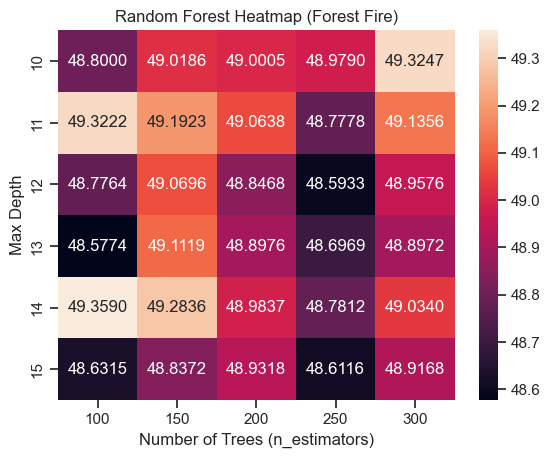

Best parameters: {'max_depth': 13, 'n_estimators': 100}
Best RMSE Value: 107.02354982601825
Variance of RMSE for Best Parameters: 355.34982475985026


In [21]:
# Create random forest (Forest Fire)
random_forest_F = RandomForestRegressor(random_state=42)
forest_settings_F = {
    'n_estimators':[100,150,200,250,300],
    'max_depth':[10,11,12,13,14,15]
}
grid_search_random_F = GridSearchCV(random_forest_F, forest_settings_F ,scoring='neg_root_mean_squared_error')
grid_search_random_F.fit(X_train_F_raw, y_train_F_raw)

results_F= pd.DataFrame(grid_search_random_F.cv_results_)
results_F["mean_test_score"] = -results_F["mean_test_score"]

heatmap_F = results_F.pivot(index="param_max_depth", columns="param_n_estimators", values="mean_test_score")
sns.heatmap(heatmap_F, annot=True, fmt=".4f")

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Max Depth")
plt.title("Random Forest Heatmap (Forest Fire)")
plt.show()

best_params_forest = grid_search_random_F.best_params_
std_forest = results_F["std_test_score"][grid_search_random_F.best_index_]
variance_forest = std_forest**2

random_forest_best_F = RandomForestRegressor(n_estimators=best_params_forest['n_estimators'], max_depth=best_params_forest['max_depth'],random_state=42)
random_forest_best_F.fit(X_train_F_raw, y_train_F_raw)
y_pred_forest = random_forest_best_F.predict(X_test_F_raw)
RMSE_forest = root_mean_squared_error(y_test_F_raw, y_pred_forest)

print(f"Best parameters: {best_params_forest}")
print(f"Best RMSE Value: {RMSE_forest}")
print(f"Variance of RMSE for Best Parameters: {variance_forest}")

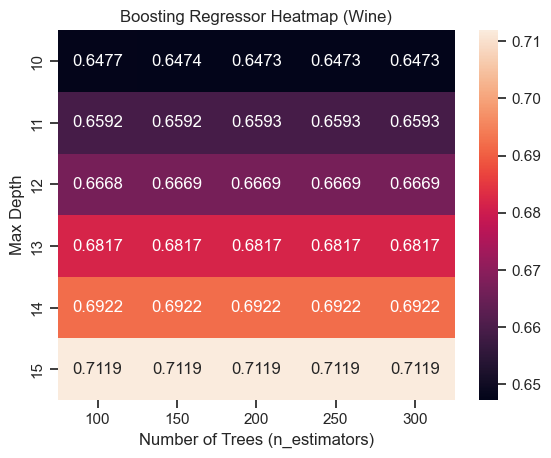

Best parameters: {'max_depth': 10, 'n_estimators': 250}
Best RMSE Value: 0.5809802816623336
Variance of RMSE for Best Parameters: 0.0008895244554018227


In [26]:
# GradientBoostingRegressor (Wine)
random_forest = GradientBoostingRegressor(random_state=42)
forest_settings = {
    'n_estimators':[100,150,200,250,300],
    'max_depth':[10,11,12,13,14,15]
}
grid_search_random = GridSearchCV(random_forest, forest_settings ,scoring='neg_root_mean_squared_error')
grid_search_random.fit(X_train_raw, y_train_raw)

results= pd.DataFrame(grid_search_random.cv_results_)
results["mean_test_score"] = -results["mean_test_score"]

heatmap = results.pivot(index="param_max_depth", columns="param_n_estimators", values="mean_test_score")
sns.heatmap(heatmap, annot=True, fmt=".4f")

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Max Depth")
plt.title("Boosting Regressor Heatmap (Wine)")
plt.show()

best_params_wine = grid_search_random.best_params_
std_wine = results["std_test_score"][grid_search_random.best_index_]
variance_wine = std_wine**2

random_forest_best = GradientBoostingRegressor(n_estimators=best_params_wine['n_estimators'], max_depth=best_params_wine['max_depth'],random_state=42)
random_forest_best.fit(X_train_raw, y_train_raw)
y_pred_wine = random_forest_best.predict(X_test_raw)
RMSE_wine = root_mean_squared_error(y_test_raw, y_pred_wine)

print(f"Best parameters: {best_params_wine}")
print(f"Best RMSE Value: {RMSE_wine}")
print(f"Variance of RMSE for Best Parameters: {variance_wine}")

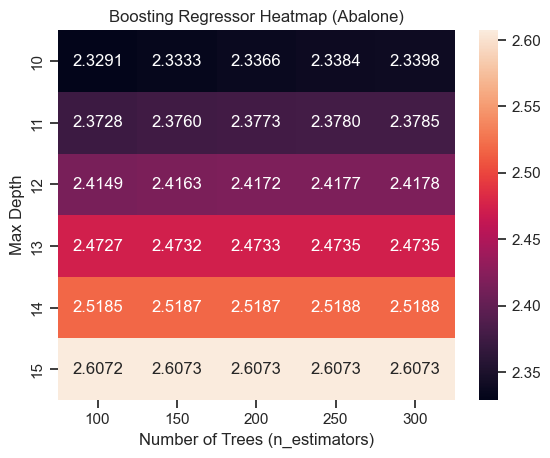

Best parameters: {'max_depth': 10, 'n_estimators': 100}
Best RMSE Value: 2.3503630797415087
Variance of RMSE for Best Parameters: 0.007758889242824441


In [27]:
# GradientBoostingRegressor (Abalone)
random_forest_A = GradientBoostingRegressor(random_state=42)
forest_settings_A = {
    'n_estimators':[100,150,200,250,300],
    'max_depth':[10,11,12,13,14,15]
}
grid_search_random_A = GridSearchCV(random_forest_A, forest_settings_A ,scoring='neg_root_mean_squared_error')
grid_search_random_A.fit(X_train_A_raw, y_train_A_raw)

results_A= pd.DataFrame(grid_search_random_A.cv_results_)
results_A["mean_test_score"] = -results_A["mean_test_score"]

heatmap_A = results_A.pivot(index="param_max_depth", columns="param_n_estimators", values="mean_test_score")
sns.heatmap(heatmap_A, annot=True, fmt=".4f")

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Max Depth")
plt.title("Boosting Regressor Heatmap (Abalone)")
plt.show()

best_params_abalone = grid_search_random_A.best_params_
std_abalone = results_A["std_test_score"][grid_search_random_A.best_index_]
variance_abalone = std_abalone**2

random_forest_best_A = GradientBoostingRegressor(n_estimators=best_params_abalone['n_estimators'], max_depth=best_params_abalone['max_depth'],random_state=42)
random_forest_best_A.fit(X_train_A_raw, y_train_A_raw)
y_pred_abalone = random_forest_best_A.predict(X_test_A_raw)
RMSE_abalone = root_mean_squared_error(y_test_A_raw, y_pred_abalone)

print(f"Best parameters: {best_params_abalone}")
print(f"Best RMSE Value: {RMSE_abalone}")
print(f"Variance of RMSE for Best Parameters: {variance_abalone}")

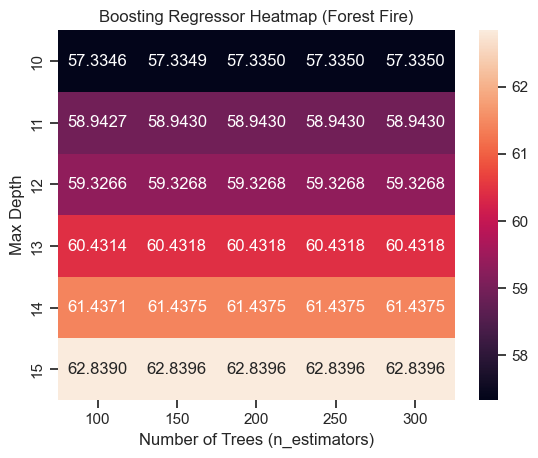

Best parameters: {'max_depth': 10, 'n_estimators': 100}
Best RMSE Value: 112.14560845567036
Variance of RMSE for Best Parameters: 496.43833990973775


In [28]:
# GradientBoostingRegressor (Forest Fire)
random_forest_F = GradientBoostingRegressor(random_state=42)
forest_settings_F = {
    'n_estimators':[100,150,200,250,300],
    'max_depth':[10,11,12,13,14,15]
}
grid_search_random_F = GridSearchCV(random_forest_F, forest_settings_F ,scoring='neg_root_mean_squared_error')
grid_search_random_F.fit(X_train_F_raw, y_train_F_raw)

results_F= pd.DataFrame(grid_search_random_F.cv_results_)
results_F["mean_test_score"] = -results_F["mean_test_score"]

heatmap_F = results_F.pivot(index="param_max_depth", columns="param_n_estimators", values="mean_test_score")
sns.heatmap(heatmap_F, annot=True, fmt=".4f")

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Max Depth")
plt.title("Boosting Regressor Heatmap (Forest Fire)")
plt.show()

best_params_forest = grid_search_random_F.best_params_
std_forest = results_F["std_test_score"][grid_search_random_F.best_index_]
variance_forest = std_forest**2

random_forest_best_F = GradientBoostingRegressor(n_estimators=best_params_forest['n_estimators'], max_depth=best_params_forest['max_depth'],random_state=42)
random_forest_best_F.fit(X_train_F_raw, y_train_F_raw)
y_pred_forest = random_forest_best_F.predict(X_test_F_raw)
RMSE_forest = root_mean_squared_error(y_test_F_raw, y_pred_forest)

print(f"Best parameters: {best_params_forest}")
print(f"Best RMSE Value: {RMSE_forest}")
print(f"Variance of RMSE for Best Parameters: {variance_forest}")

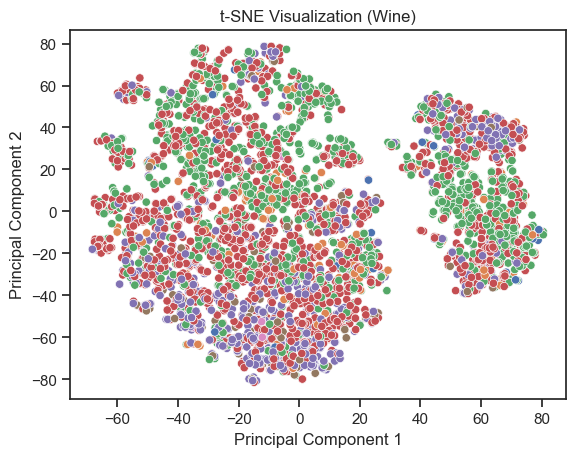

In [7]:
# t-SNE Visualization (Wine)
tsne = TSNE(n_components=2, random_state=42)
TSNE_wine = tsne.fit_transform(X_train)  
TSNE_wine_dataframe = pd.DataFrame(TSNE_wine, columns=["Principal Component 1", "Principal Component 2"])

plot_wine = sns.scatterplot(x=TSNE_wine_dataframe["Principal Component 1"], y=TSNE_wine_dataframe["Principal Component 2"], hue=y_train, palette="deep", 
                            legend=False)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("t-SNE Visualization (Wine)")
plt.show()

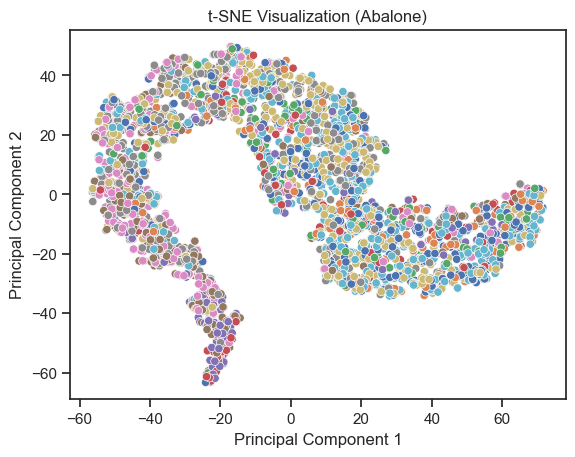

In [19]:
# t-SNE Visualization (Abalone)
tsne_A = TSNE(n_components=2, random_state=42)
TSNE_abalone = tsne_A.fit_transform(X_train_A)  
TSNE_abalone_dataframe = pd.DataFrame(TSNE_abalone, columns=["Principal Component 1", "Principal Component 2"])

sns.scatterplot(x=TSNE_abalone_dataframe["Principal Component 1"], y=TSNE_abalone_dataframe["Principal Component 2"], hue=y_train_A, palette="deep",
                legend=False)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("t-SNE Visualization (Abalone)")
plt.show()

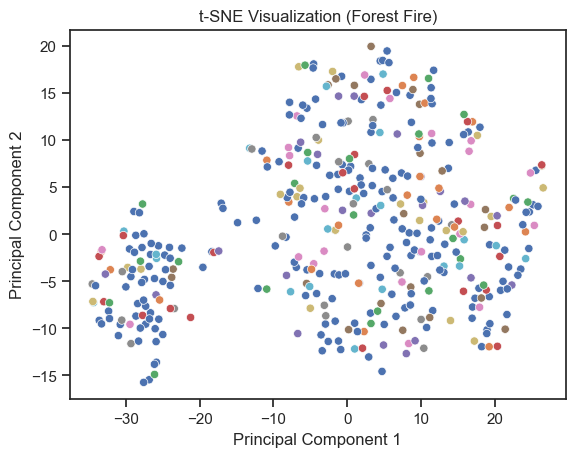

In [20]:
# t-SNE Visualization (Forest Fire)
tsne_F = TSNE(n_components=2, random_state=42)
TSNE_forest = tsne_F.fit_transform(X_train_F)  
TSNE_forest_dataframe = pd.DataFrame(TSNE_forest, columns=["Principal Component 1", "Principal Component 2"])

sns.scatterplot(x=TSNE_forest_dataframe["Principal Component 1"], y=TSNE_forest_dataframe["Principal Component 2"], hue=y_train_F, palette="deep", 
                legend=False)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("t-SNE Visualization (Forest Fire)")
plt.show()

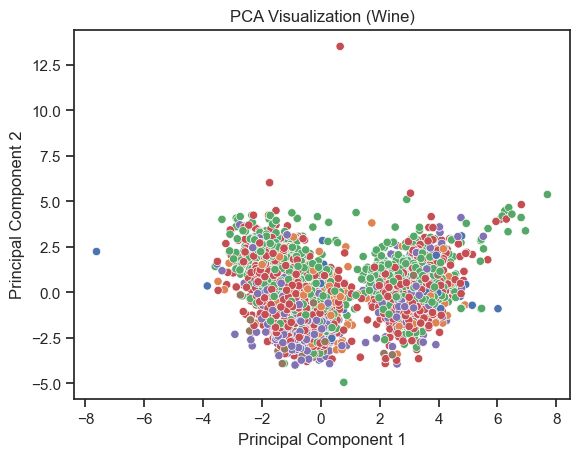

Total Variance of PCA: 0.5275468916888595


In [86]:
# PCA Visualization (Wine)
pca = PCA(n_components=2, random_state=42)
PCA_wine = pca.fit_transform(X_train)  
PCA_wine_dataframe = pd.DataFrame(PCA_wine, columns=["Principal Component 1", "Principal Component 2"])

plot_wine_pca = sns.scatterplot(x=PCA_wine_dataframe["Principal Component 1"], y=PCA_wine_dataframe["Principal Component 2"], hue=y_train, palette="deep", 
                            legend=False)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization (Wine)")
plt.show()

print(f"Total Variance of PCA: {sum(pca.explained_variance_ratio_)}")

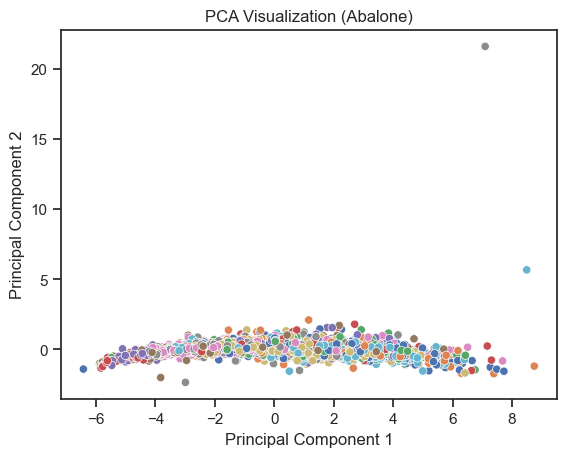

Total Variance of PCA: 0.9476456622587304


In [87]:
# PCA Visualization (Abablone)
pca_A = PCA(n_components=2, random_state=42)
PCA_abalone = pca_A.fit_transform(X_train_A)  
PCA_abalone_dataframe = pd.DataFrame(PCA_abalone, columns=["Principal Component 1", "Principal Component 2"])

plot_abalone_pca = sns.scatterplot(x=PCA_abalone_dataframe["Principal Component 1"], y=PCA_abalone_dataframe["Principal Component 2"], hue=y_train_A, palette="deep", 
                            legend=False)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization (Abalone)")
plt.show()

print(f"Total Variance of PCA: {sum(pca_A.explained_variance_ratio_)}")


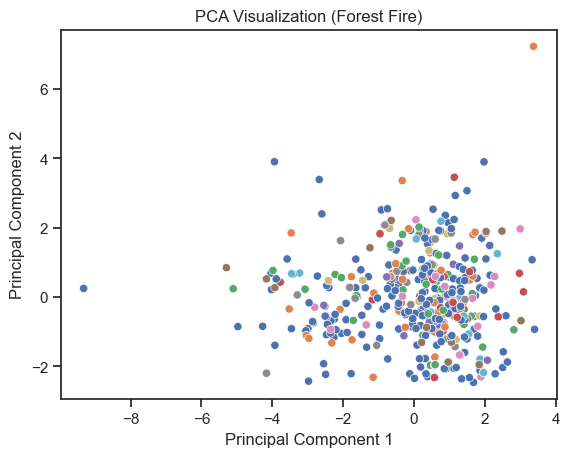

Total Variance of PCA: 0.43522960358691914


In [88]:
# PCA Visualization (Forest Fire)
pca_F = PCA(n_components=2, random_state=42)
PCA_forest = pca_F.fit_transform(X_train_F)  
PCA_forest_dataframe = pd.DataFrame(PCA_forest, columns=["Principal Component 1", "Principal Component 2"])

plot_forest_pca = sns.scatterplot(x=PCA_forest_dataframe["Principal Component 1"], y=PCA_forest_dataframe["Principal Component 2"], hue=y_train_F, palette="deep", 
                            legend=False)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization (Forest Fire)")
plt.show()

print(f"Total Variance of PCA: {sum(pca_F.explained_variance_ratio_)}")

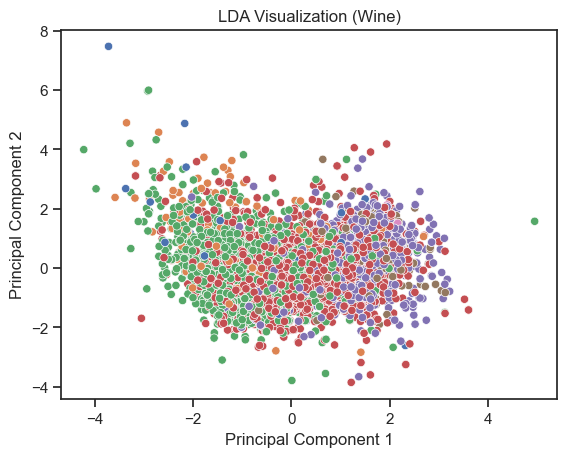

Total Variance of LDA: 0.9393420361471668


In [89]:
# LCA Visualization (Wine)
lda = LDA(n_components=2)
LDA_wine = lda.fit_transform(X_train, y_train)  
LDA_wine_dataframe = pd.DataFrame(LDA_wine, columns=["Principal Component 1", "Principal Component 2"])

plot_wine_lda = sns.scatterplot(x=LDA_wine_dataframe["Principal Component 1"], y=LDA_wine_dataframe["Principal Component 2"], hue=y_train, palette="deep", 
                            legend=False)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("LDA Visualization (Wine)")
plt.show()

print(f"Total Variance of LDA: {sum(lda.explained_variance_ratio_)}")

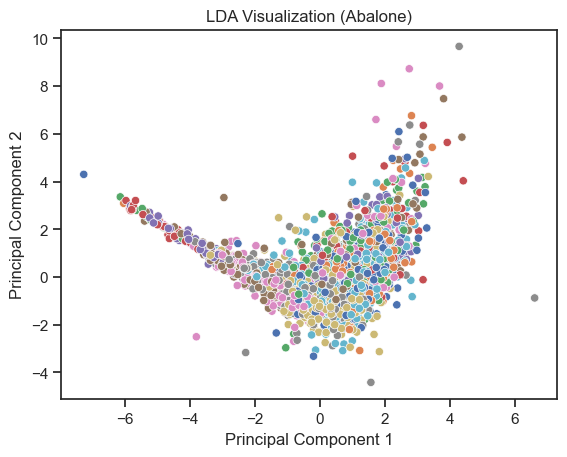

Total Variance of LDA: 0.9363093738238637


In [90]:
# LCA Visualization (Abalone)
lda_A = LDA(n_components=2)
LDA_abalone = lda_A.fit_transform(X_train_A, y_train_A)  
LDA_abalone_dataframe = pd.DataFrame(LDA_abalone, columns=["Principal Component 1", "Principal Component 2"])

plot_abalone_lda = sns.scatterplot(x=LDA_abalone_dataframe["Principal Component 1"], y=LDA_abalone_dataframe["Principal Component 2"], hue=y_train_A, palette="deep", 
                            legend=False)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("LDA Visualization (Abalone)")
plt.show()

print(f"Total Variance of LDA: {sum(lda_A.explained_variance_ratio_)}")

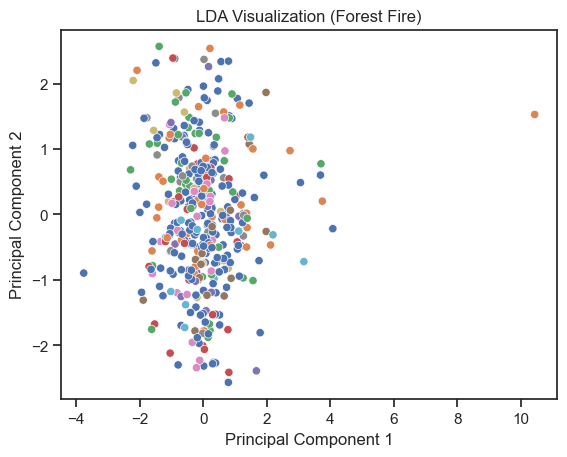

Total Variance of LDA: 0.39483151887280354


In [91]:
# LCA Visualization (Forest Fire)
y_train_F_int = np.rint(y_train_F)
lda_F = LDA(n_components=2)
LDA_forest = lda_F.fit_transform(X_train_F, y_train_F_int)  
LDA_forest_dataframe = pd.DataFrame(LDA_forest, columns=["Principal Component 1", "Principal Component 2"])

plot_forest_lda = sns.scatterplot(x=LDA_forest_dataframe["Principal Component 1"], y=LDA_forest_dataframe["Principal Component 2"], hue=y_train_F_int, palette="deep", 
                            legend=False)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("LDA Visualization (Forest Fire)")
plt.show()

print(f"Total Variance of LDA: {sum(lda_F.explained_variance_ratio_)}")

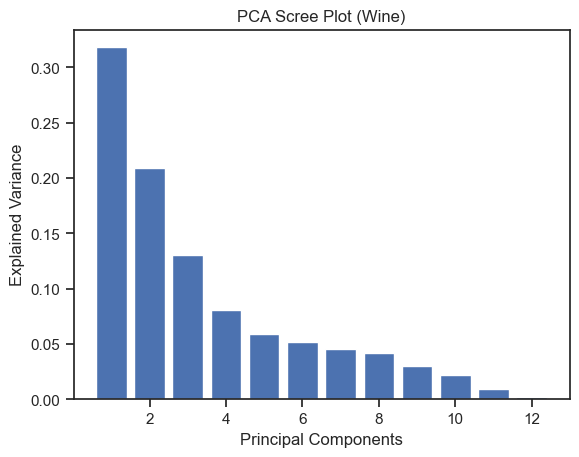

Optimal Number of Components: 9


In [6]:
# Scree Plot (Wine)
pca = PCA(random_state=42)
PCA_wine = pca.fit_transform(X_train)  

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
PC_range = np.arange(pca.n_components_) + 1

plt.bar(PC_range, explained_variance)
plt.title('PCA Scree Plot (Wine)')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()

best_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal Number of Components: {best_components}")

pca_normalized = PCA(n_components=best_components)
pca_normalized_reduced = pca_normalized.fit_transform(X_train)
wine_pca = pd.DataFrame(pca_normalized_reduced)

pca_normalized_test = PCA(n_components=best_components)
pca_normalized_reduced_test = pca_normalized_test.fit_transform(X_test)
wine_pca_test = pd.DataFrame(pca_normalized_reduced_test)

pca_normalized_raw = PCA(n_components=best_components)
pca_normalized_reduced_raw = pca_normalized_raw.fit_transform(X_train_raw)
wine_pca_raw = pd.DataFrame(pca_normalized_reduced_raw)

pca_normalized_test_raw = PCA(n_components=best_components)
pca_normalized_reduced_test_raw = pca_normalized_test_raw.fit_transform(X_test_raw)
wine_pca_test_raw = pd.DataFrame(pca_normalized_reduced_test_raw)

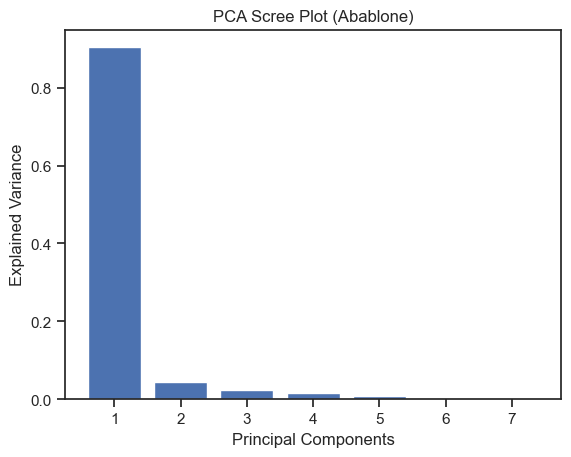

Optimal Number of Components: 3


In [7]:
# Scree Plot (Abalone)
pca_A = PCA(random_state=42)
PCA_abalone = pca_A.fit_transform(X_train_A)  

explained_variance_A = pca_A.explained_variance_ratio_
cumulative_variance_A = np.cumsum(explained_variance_A)
PC_range_A = np.arange(pca_A.n_components_) + 1

plt.bar(PC_range_A, explained_variance_A)
plt.title('PCA Scree Plot (Abablone)')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()

best_components_A = np.argmax(cumulative_variance_A >= 0.95) + 1
print(f"Optimal Number of Components: {best_components_A}")

pca_normalized_A = PCA(n_components=best_components_A)
pca_normalized_reduced_A = pca_normalized_A.fit_transform(X_train_A)
abalone_pca = pd.DataFrame(pca_normalized_reduced_A)

pca_normalized_A_test = PCA(n_components=best_components_A)
pca_normalized_reduced_A_test = pca_normalized_A_test.fit_transform(X_test_A)
abalone_pca_test = pd.DataFrame(pca_normalized_reduced_A_test)

pca_normalized_A_raw = PCA(n_components=best_components_A)
pca_normalized_reduced_A_raw = pca_normalized_A_raw.fit_transform(X_train_A_raw)
abalone_pca_raw = pd.DataFrame(pca_normalized_reduced_A_raw)

pca_normalized_A_test_raw = PCA(n_components=best_components_A)
pca_normalized_reduced_A_test_raw = pca_normalized_A_test_raw.fit_transform(X_test_A_raw)
abalone_pca_test_raw = pd.DataFrame(pca_normalized_reduced_A_test_raw)

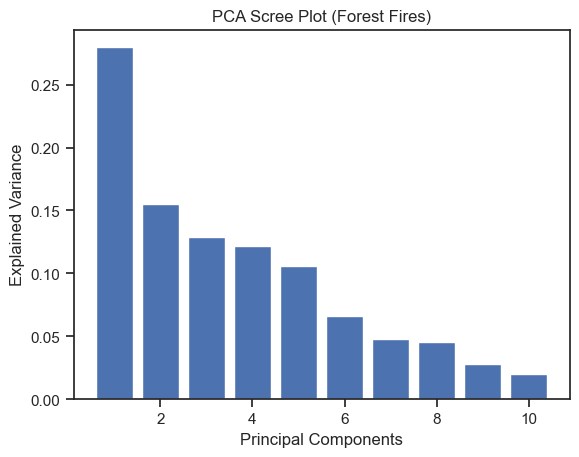

Optimal Number of Components: 8


In [8]:
# Scree Plot (Forest Fire)
pca_F = PCA(random_state=42)
PCA_forest = pca_F.fit_transform(X_train_F)  

explained_variance_F = pca_F.explained_variance_ratio_
cumulative_variance_F = np.cumsum(explained_variance_F)
PC_range_A = np.arange(pca_F.n_components_) + 1

plt.bar(PC_range_A, explained_variance_F)
plt.title('PCA Scree Plot (Forest Fires)')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()

best_components_F = np.argmax(cumulative_variance_F >= 0.95) + 1
print(f"Optimal Number of Components: {best_components_F}")

pca_normalized_F = PCA(n_components=best_components_F)
pca_normalized_reduced_F = pca_normalized_F.fit_transform(X_train_F)
forest_pca = pd.DataFrame(pca_normalized_reduced_F)

pca_normalized_F_test = PCA(n_components=best_components_F)
pca_normalized_reduced_F_test = pca_normalized_F_test.fit_transform(X_test_F)
forest_pca_test = pd.DataFrame(pca_normalized_reduced_F_test)

pca_normalized_F_raw = PCA(n_components=best_components_F)
pca_normalized_reduced_F_raw = pca_normalized_F_raw.fit_transform(X_train_F_raw)
forest_pca_raw = pd.DataFrame(pca_normalized_reduced_F_raw)

pca_normalized_F_test_raw = PCA(n_components=best_components_F)
pca_normalized_reduced_F_test_raw = pca_normalized_F_test_raw.fit_transform(X_test_F_raw)
forest_pca_test_raw = pd.DataFrame(pca_normalized_reduced_F_test_raw)

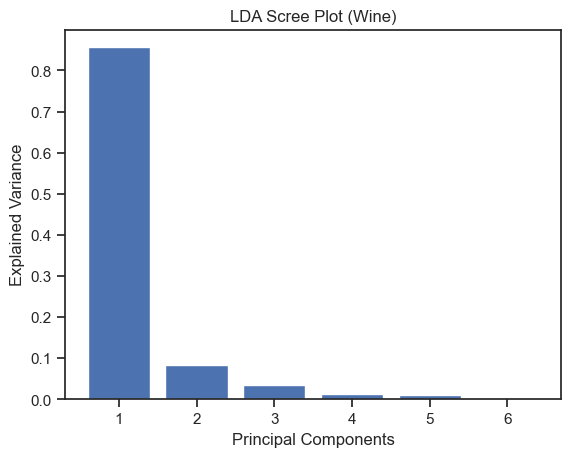

Optimal Number of Components: 3


In [9]:
# Scree Plot LDA (Wine)
lda = LDA()
LDA_wine = lda.fit_transform(X_train, y_train)  

explained_variance = lda.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
LDA_range = np.arange(1, len(explained_variance) + 1) 

plt.bar(LDA_range, explained_variance)
plt.title('LDA Scree Plot (Wine)')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()

best_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal Number of Components: {best_components}")

lda_normalized = LDA(n_components=best_components)
lda_normalized_reduced = lda_normalized.fit_transform(X_train, y_train)
wine_lda = pd.DataFrame(lda_normalized_reduced)

lda_normalized_test = LDA(n_components=best_components)
lda_normalized_reduced_test = lda_normalized_test.fit_transform(X_test, y_test)
wine_lda_test = pd.DataFrame(lda_normalized_reduced_test)

lda_normalized_raw = LDA(n_components=best_components)
lda_normalized_reduced_raw = lda_normalized_raw.fit_transform(X_train_raw, y_train_raw)
wine_lda_raw = pd.DataFrame(lda_normalized_reduced_raw)

lda_normalized_test_raw = LDA(n_components=best_components)
lda_normalized_reduced_test_raw = lda_normalized_test_raw.fit_transform(X_test_raw, y_test_raw)
wine_lda_test_raw = pd.DataFrame(lda_normalized_reduced_test_raw)

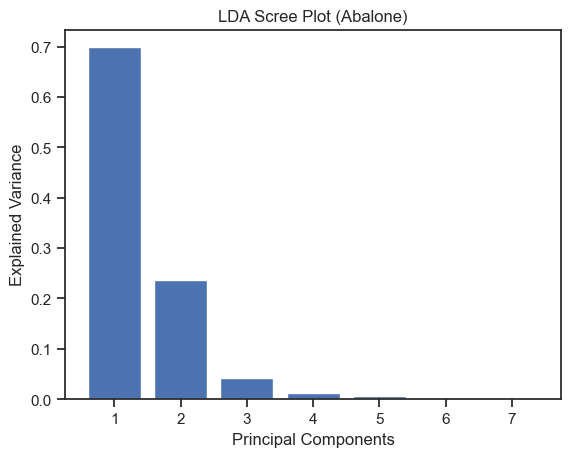

Optimal Number of Components: 3


In [10]:
# Scree Plot LDA (Abalone)
lda_A = LDA()
LDA_abalone = lda_A.fit_transform(X_train_A, y_train_A)  

explained_variance_A = lda_A.explained_variance_ratio_
cumulative_variance_A = np.cumsum(explained_variance_A)
LDA_range_A = np.arange(1, len(explained_variance_A) + 1) 

plt.bar(LDA_range_A, explained_variance_A)
plt.title('LDA Scree Plot (Abalone)')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()

best_components_A = np.argmax(cumulative_variance_A >= 0.95) + 1
print(f"Optimal Number of Components: {best_components_A}")

lda_normalized_A = LDA(n_components=best_components_A)
lda_normalized_reduced_A = lda_normalized_A.fit_transform(X_train_A, y_train_A)
abalone_lda = pd.DataFrame(lda_normalized_reduced_A)

lda_normalized_A_test = LDA(n_components=best_components_A)
lda_normalized_reduced_A_test = lda_normalized_A_test.fit_transform(X_test_A, y_test_A)
abalone_lda_test = pd.DataFrame(lda_normalized_reduced_A_test)

lda_normalized_A_raw = LDA(n_components=best_components_A)
lda_normalized_reduced_A_raw = lda_normalized_A_raw.fit_transform(X_train_A_raw, y_train_A_raw)
abalone_lda_raw = pd.DataFrame(lda_normalized_reduced_A_raw)

lda_normalized_A_test_raw = LDA(n_components=best_components_A)
lda_normalized_reduced_A_test_raw = lda_normalized_A_test_raw.fit_transform(X_test_A_raw, y_test_A_raw)
abalone_lda_test_raw = pd.DataFrame(lda_normalized_reduced_A_test_raw)

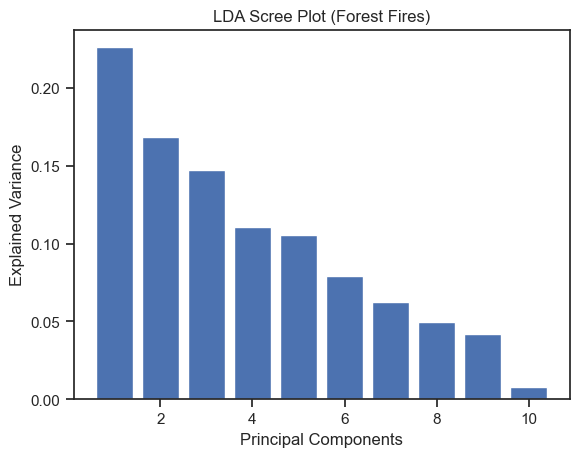

Optimal Number of Components: 8


In [11]:
# Scree Plot LDA (Forest Fire)
y_train_F_int = np.rint(y_train_F)
y_test_F_int = np.rint(y_test_F)
y_train_F_int_raw = np.rint(y_train_F_raw)
y_test_F_int_raw = np.rint(y_test_F_raw)

lda_F = LDA()
LDA_forest = lda_F.fit_transform(X_train_F, y_train_F_int)  

explained_variance_F = lda_F.explained_variance_ratio_
cumulative_variance_F = np.cumsum(explained_variance_F)
LDA_range_F = np.arange(1, len(explained_variance_F) + 1) 

plt.bar(LDA_range_F, explained_variance_F)
plt.title('LDA Scree Plot (Forest Fires)')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()

best_components_F = np.argmax(cumulative_variance_F >= 0.95) + 1
print(f"Optimal Number of Components: {best_components_F}")

lda_normalized_F = LDA(n_components=best_components_F)
lda_normalized_reduced_F = lda_normalized_F.fit_transform(X_train_F, y_train_F_int)
forest_lda = pd.DataFrame(lda_normalized_reduced_F)

lda_normalized_F_test = LDA(n_components=best_components_F)
lda_normalized_reduced_F_test = lda_normalized_F_test.fit_transform(X_test_F, y_test_F_int)
forest_lda_test = pd.DataFrame(lda_normalized_reduced_F_test)

lda_normalized_F_raw = LDA(n_components=best_components_F)
lda_normalized_reduced_F_raw = lda_normalized_F_raw.fit_transform(X_train_F_raw, y_train_F_int_raw)
forest_lda_raw = pd.DataFrame(lda_normalized_reduced_F_raw)

lda_normalized_F_test_raw = LDA(n_components=best_components_F)
lda_normalized_reduced_F_test_raw = lda_normalized_F_test_raw.fit_transform(X_test_F_raw, y_test_F_int_raw)
forest_lda_test_raw = pd.DataFrame(lda_normalized_reduced_F_test_raw)

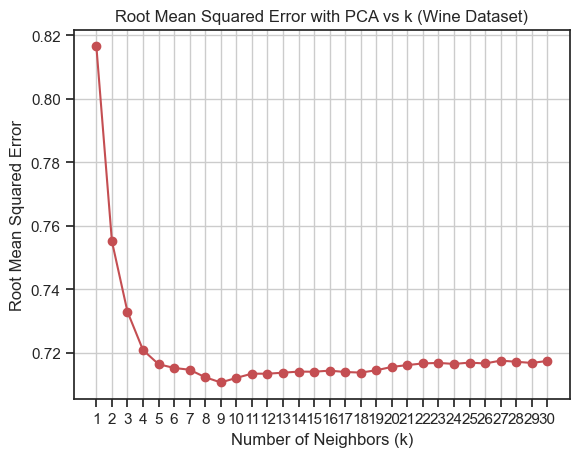

Best k Value: 9
Best RMSE Value: 0.711818558355283
Variance of RMSE for Best k: 0.00032971377549498244


In [180]:
# Create array to store k values with their mean validation accuracy (Wine)
k_values=range(1,31)
RMSE=[]
RMSE_variance=[]
for k in k_values:
    k_nearest_wine = neighbors.KNeighborsRegressor(n_neighbors=k)
    cross_val_error = cross_val_score(k_nearest_wine, wine_pca, y_train, scoring='neg_root_mean_squared_error')
    RMSE.append((-1)*cross_val_error.mean())
    RMSE_variance.append(cross_val_error.var())


# Create plot for k_values vs mean squared error (Wine)
plt.plot(k_values, RMSE, marker='o', linestyle='-', color='r')
plt.xticks(k_values)
plt.title('Root Mean Squared Error with PCA vs k (Wine Dataset)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Root Mean Squared Error')
plt.grid()
plt.show()

#Find lowest RMSE value
min_rmse = min(RMSE) 
best_k_wine = RMSE.index(min_rmse) + 1

# Root Mean Squared Error after training with best k (Wine)
k_nearest_wine_best=neighbors.KNeighborsRegressor(n_neighbors=best_k_wine)
k_nearest_wine_best.fit(wine_pca, y_train)

y_pred_wine = k_nearest_wine_best.predict(wine_pca_test)
RMSE_wine_best = root_mean_squared_error(y_test, y_pred_wine)
print(f"Best k Value: {best_k_wine}")
print(f"Best RMSE Value: {RMSE_wine_best}")
print(f"Variance of RMSE for Best k: {RMSE_variance[best_k_wine - 1]}")

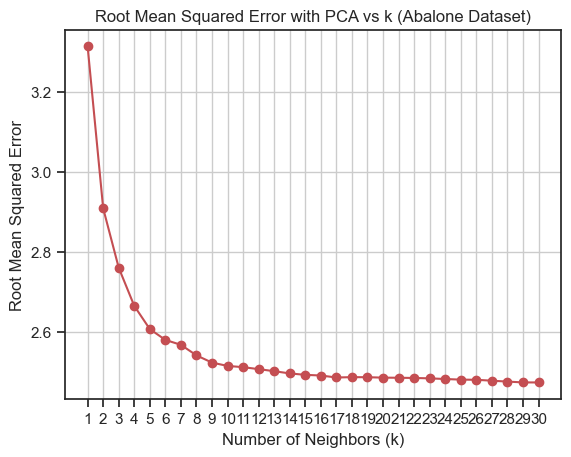

Best k value: 30
Best RMSE Value: 2.7381810689193284
Variance of RMSE for Best k: 0.027544664624116984


In [186]:
# Create array to store k values with their mean validation accuracy (Abalone)
RMSE_A = []
RMSE_variance_A = []
for k in k_values:
    k_nearest_abalone = neighbors.KNeighborsRegressor(n_neighbors=k)
    cross_val_error_A = cross_val_score(k_nearest_abalone, abalone_pca, y_train_A, scoring='neg_root_mean_squared_error')
    RMSE_A.append((-1)*cross_val_error_A.mean())
    RMSE_variance_A.append(cross_val_error_A.var())

# Create plot for k_values vs mean squared error (Abalone)
plt.plot(k_values, RMSE_A, marker='o', linestyle='-', color='r')
plt.xticks(k_values)
plt.title('Root Mean Squared Error with PCA vs k (Abalone Dataset)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Root Mean Squared Error')
plt.grid()
plt.show()

#Find lowest RMSE value with PCA and best k value (Abalone)
min_rmse_A = min(RMSE_A) 
best_k_abalone = RMSE_A.index(min_rmse_A) + 1

# Root Mean Squared Error after training with best k (Abalone)
k_nearest_abalone_best = neighbors.KNeighborsRegressor(n_neighbors=best_k_abalone)
k_nearest_abalone_best.fit(abalone_pca, y_train_A)
y_pred_abalone = k_nearest_abalone_best.predict(abalone_pca_test)
RMSE_abalone_best = root_mean_squared_error(y_test_A, y_pred_abalone)
print(f"Best k value: {best_k_abalone}")
print(f"Best RMSE Value: {RMSE_abalone_best}")
print(f"Variance of RMSE for Best k: {RMSE_variance_A[best_k_abalone - 1]}")


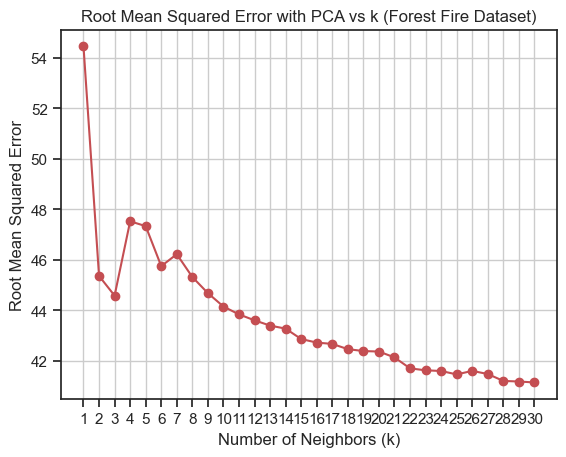

Best k value: 30
Best RMSE Value: 108.00109044211001
Variance of RMSE for Best k: 492.9408937441629


In [187]:
# Create array to store k values with their mean validation accuracy (Forest Fire)
RMSE_F = []
RMSE_variance_F = []
for k in k_values:
    k_nearest_forest = neighbors.KNeighborsRegressor(n_neighbors=k)
    cross_val_error_F = cross_val_score(k_nearest_forest, forest_pca, y_train_F, scoring='neg_root_mean_squared_error')
    RMSE_F.append((-1)*cross_val_error_F.mean())
    RMSE_variance_F.append(cross_val_error_F.var())

# Create plot for k_values vs mean squared error (Forest Fire)
plt.plot(k_values, RMSE_F, marker='o', linestyle='-', color='r')
plt.xticks(k_values)
plt.title('Root Mean Squared Error with PCA vs k (Forest Fire Dataset)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Root Mean Squared Error')
plt.grid()
plt.show()

#Find lowest RMSE value and best k value (Abalone)
min_rmse_F = min(RMSE_F) 
best_k_forest = RMSE_F.index(min_rmse_F) + 1

# Root Mean Squared Error after training with best k (Forest Fire)
k_nearest_forest_best = neighbors.KNeighborsRegressor(n_neighbors=best_k_forest)
k_nearest_forest_best.fit(forest_pca, y_train_F)
y_pred_forest = k_nearest_forest_best.predict(forest_pca_test)
RMSE_forest_best = root_mean_squared_error(y_test_F, y_pred_forest)
print(f"Best k value: {best_k_forest}")
print(f"Best RMSE Value: {RMSE_forest_best}")
print(f"Variance of RMSE for Best k: {RMSE_variance_F[best_k_forest - 1]}")

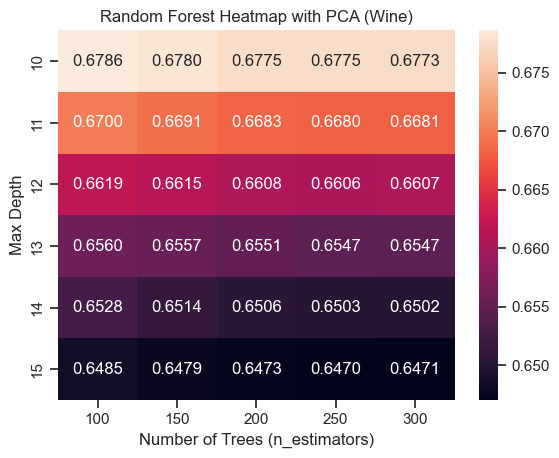

Best parameters: {'max_depth': 15, 'n_estimators': 250}
Best RMSE Value: 0.6386186683422806
Variance of RMSE for Best Parameters: 0.0003532747430202318


In [211]:
# Create random forest (Wine)
random_forest = RandomForestRegressor(random_state=42)
forest_settings = {
    'n_estimators':[100,150,200,250,300],
    'max_depth':[10,11,12,13,14,15]
}
grid_search_random = GridSearchCV(random_forest, forest_settings ,scoring='neg_root_mean_squared_error')
grid_search_random.fit(wine_pca_raw, y_train_raw)

results= pd.DataFrame(grid_search_random.cv_results_)
results["mean_test_score"] = -results["mean_test_score"]

heatmap = results.pivot(index="param_max_depth", columns="param_n_estimators", values="mean_test_score")
sns.heatmap(heatmap, annot=True, fmt=".4f")

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Max Depth")
plt.title("Random Forest Heatmap with PCA (Wine)")
plt.show()

best_params_wine = grid_search_random.best_params_
std_wine = results["std_test_score"][grid_search_random.best_index_]
variance_wine = std_wine**2

random_forest_best = RandomForestRegressor(n_estimators=best_params_wine['n_estimators'], max_depth=best_params_wine['max_depth'],random_state=42)
random_forest_best.fit(wine_pca_raw, y_train_raw)
y_pred_wine = random_forest_best.predict(wine_pca_test_raw)
RMSE_wine = root_mean_squared_error(y_test_raw, y_pred_wine)

print(f"Best parameters: {best_params_wine}")
print(f"Best RMSE Value: {RMSE_wine}")
print(f"Variance of RMSE for Best Parameters: {variance_wine}")

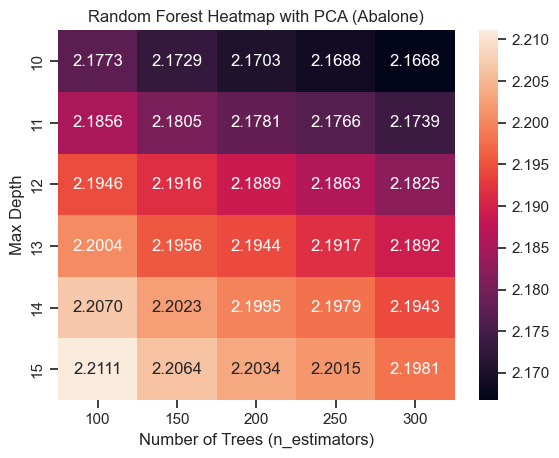

Best parameters: {'max_depth': 10, 'n_estimators': 300}
Best RMSE Value: 2.2858866207238204
Variance of RMSE for Best Parameters: 0.010912624212289598


In [212]:
# Create random forest (Abalone)
random_forest_A = RandomForestRegressor(random_state=42)
forest_settings_A = {
    'n_estimators':[100,150,200,250,300],
    'max_depth':[10,11,12,13,14,15]
}
grid_search_random_A = GridSearchCV(random_forest_A, forest_settings_A ,scoring='neg_root_mean_squared_error')
grid_search_random_A.fit(abalone_pca_raw, y_train_A_raw)

results_A= pd.DataFrame(grid_search_random_A.cv_results_)
results_A["mean_test_score"] = -results_A["mean_test_score"]

heatmap_A = results_A.pivot(index="param_max_depth", columns="param_n_estimators", values="mean_test_score")
sns.heatmap(heatmap_A, annot=True, fmt=".4f")

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Max Depth")
plt.title("Random Forest Heatmap with PCA (Abalone)")
plt.show()

best_params_abalone = grid_search_random_A.best_params_
std_abalone = results_A["std_test_score"][grid_search_random_A.best_index_]
variance_abalone = std_abalone**2

random_forest_best_A = RandomForestRegressor(n_estimators=best_params_abalone['n_estimators'], max_depth=best_params_abalone['max_depth'],random_state=42)
random_forest_best_A.fit(abalone_pca_raw, y_train_A_raw)
y_pred_abalone = random_forest_best_A.predict(abalone_pca_test_raw)
RMSE_abalone = root_mean_squared_error(y_test_A_raw, y_pred_abalone)

print(f"Best parameters: {best_params_abalone}")
print(f"Best RMSE Value: {RMSE_abalone}")
print(f"Variance of RMSE for Best Parameters: {variance_abalone}")

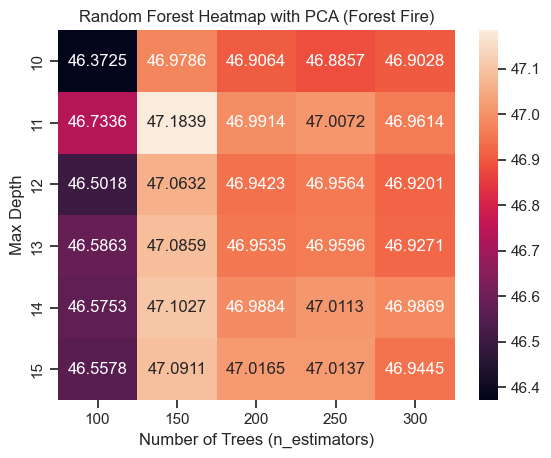

Best parameters: {'max_depth': 10, 'n_estimators': 100}
Best RMSE Value: 108.49033472958993
Variance of RMSE for Best Parameters: 412.35597198800303


In [213]:
# Create random forest (Forest Fire)
random_forest_F = RandomForestRegressor(random_state=42)
forest_settings_F = {
    'n_estimators':[100,150,200,250,300],
    'max_depth':[10,11,12,13,14,15]
}
grid_search_random_F = GridSearchCV(random_forest_F, forest_settings_F ,scoring='neg_root_mean_squared_error')
grid_search_random_F.fit(forest_pca_raw, y_train_F_raw)

results_F= pd.DataFrame(grid_search_random_F.cv_results_)
results_F["mean_test_score"] = -results_F["mean_test_score"]

heatmap_F = results_F.pivot(index="param_max_depth", columns="param_n_estimators", values="mean_test_score")
sns.heatmap(heatmap_F, annot=True, fmt=".4f")

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Max Depth")
plt.title("Random Forest Heatmap with PCA (Forest Fire)")
plt.show()

best_params_forest = grid_search_random_F.best_params_
std_forest = results_F["std_test_score"][grid_search_random_F.best_index_]
variance_forest = std_forest**2

random_forest_best_F = RandomForestRegressor(n_estimators=best_params_forest['n_estimators'], max_depth=best_params_forest['max_depth'],random_state=42)
random_forest_best_F.fit(forest_pca_raw, y_train_F_raw)
y_pred_forest = random_forest_best_F.predict(forest_pca_test_raw)
RMSE_forest = root_mean_squared_error(y_test_F_raw, y_pred_forest)

print(f"Best parameters: {best_params_forest}")
print(f"Best RMSE Value: {RMSE_forest}")
print(f"Variance of RMSE for Best Parameters: {variance_forest}")

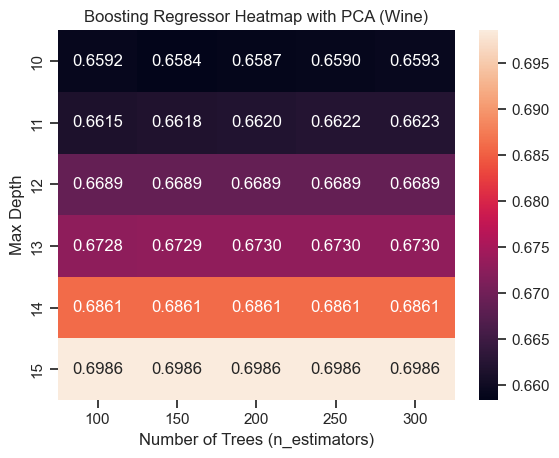

Best parameters: {'max_depth': 10, 'n_estimators': 150}
Best RMSE Value: 0.6650348508200049
Variance of RMSE for Best Parameters: 0.0005520993260288268


In [218]:
# GradientBoostingRegressor (Wine)
random_forest = GradientBoostingRegressor(random_state=42)
forest_settings = {
    'n_estimators':[100,150,200,250,300],
    'max_depth':[10,11,12,13,14,15]
}
grid_search_random = GridSearchCV(random_forest, forest_settings ,scoring='neg_root_mean_squared_error')
grid_search_random.fit(wine_pca_raw, y_train_raw)

results= pd.DataFrame(grid_search_random.cv_results_)
results["mean_test_score"] = -results["mean_test_score"]

heatmap = results.pivot(index="param_max_depth", columns="param_n_estimators", values="mean_test_score")
sns.heatmap(heatmap, annot=True, fmt=".4f")

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Max Depth")
plt.title("Boosting Regressor Heatmap with PCA (Wine)")
plt.show()

best_params_wine = grid_search_random.best_params_
std_wine = results["std_test_score"][grid_search_random.best_index_]
variance_wine = std_wine**2

random_forest_best = GradientBoostingRegressor(n_estimators=best_params_wine['n_estimators'], max_depth=best_params_wine['max_depth'],random_state=42)
random_forest_best.fit(wine_pca_raw, y_train_raw)
y_pred_wine = random_forest_best.predict(wine_pca_test_raw)
RMSE_wine = root_mean_squared_error(y_test_raw, y_pred_wine)

print(f"Best parameters: {best_params_wine}")
print(f"Best RMSE Value: {RMSE_wine}")
print(f"Variance of RMSE for Best Parameters: {variance_wine}")

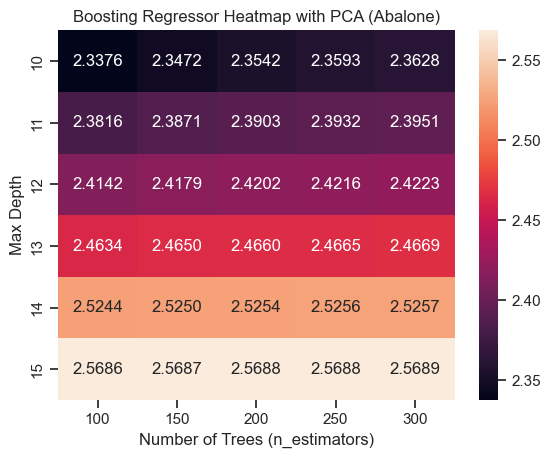

Best parameters: {'max_depth': 10, 'n_estimators': 100}
Best RMSE Value: 2.5357094549845693
Variance of RMSE for Best Parameters: 0.010851683579049804


In [219]:
# GradientBoostingRegressor (Abalone)
random_forest_A = GradientBoostingRegressor(random_state=42)
forest_settings_A = {
    'n_estimators':[100,150,200,250,300],
    'max_depth':[10,11,12,13,14,15]
}
grid_search_random_A = GridSearchCV(random_forest_A, forest_settings_A ,scoring='neg_root_mean_squared_error')
grid_search_random_A.fit(abalone_pca_raw, y_train_A_raw)

results_A= pd.DataFrame(grid_search_random_A.cv_results_)
results_A["mean_test_score"] = -results_A["mean_test_score"]

heatmap_A = results_A.pivot(index="param_max_depth", columns="param_n_estimators", values="mean_test_score")
sns.heatmap(heatmap_A, annot=True, fmt=".4f")

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Max Depth")
plt.title("Boosting Regressor Heatmap with PCA (Abalone)")
plt.show()

best_params_abalone = grid_search_random_A.best_params_
std_abalone = results_A["std_test_score"][grid_search_random_A.best_index_]
variance_abalone = std_abalone**2

random_forest_best_A = GradientBoostingRegressor(n_estimators=best_params_abalone['n_estimators'], max_depth=best_params_abalone['max_depth'],random_state=42)
random_forest_best_A.fit(abalone_pca_raw, y_train_A_raw)
y_pred_abalone = random_forest_best_A.predict(abalone_pca_test_raw)
RMSE_abalone = root_mean_squared_error(y_test_A_raw, y_pred_abalone)

print(f"Best parameters: {best_params_abalone}")
print(f"Best RMSE Value: {RMSE_abalone}")
print(f"Variance of RMSE for Best Parameters: {variance_abalone}")

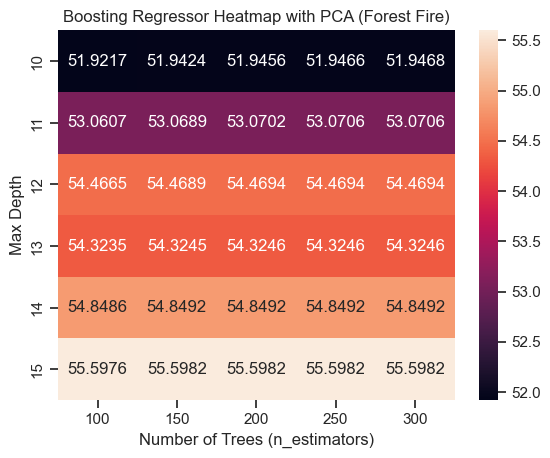

Best parameters: {'max_depth': 10, 'n_estimators': 100}
Best RMSE Value: 110.80171691146018
Variance of RMSE for Best Parameters: 392.1632941140432


In [220]:
# GradientBoostingRegressor (Forest Fire)
random_forest_F = GradientBoostingRegressor(random_state=42)
forest_settings_F = {
    'n_estimators':[100,150,200,250,300],
    'max_depth':[10,11,12,13,14,15]
}
grid_search_random_F = GridSearchCV(random_forest_F, forest_settings_F ,scoring='neg_root_mean_squared_error')
grid_search_random_F.fit(forest_pca_raw, y_train_F_raw)

results_F= pd.DataFrame(grid_search_random_F.cv_results_)
results_F["mean_test_score"] = -results_F["mean_test_score"]

heatmap_F = results_F.pivot(index="param_max_depth", columns="param_n_estimators", values="mean_test_score")
sns.heatmap(heatmap_F, annot=True, fmt=".4f")

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Max Depth")
plt.title("Boosting Regressor Heatmap with PCA (Forest Fire)")
plt.show()

best_params_forest = grid_search_random_F.best_params_
std_forest = results_F["std_test_score"][grid_search_random_F.best_index_]
variance_forest = std_forest**2

random_forest_best_F = GradientBoostingRegressor(n_estimators=best_params_forest['n_estimators'], max_depth=best_params_forest['max_depth'],random_state=42)
random_forest_best_F.fit(forest_pca_raw, y_train_F_raw)
y_pred_forest = random_forest_best_F.predict(forest_pca_test_raw)
RMSE_forest = root_mean_squared_error(y_test_F_raw, y_pred_forest)

print(f"Best parameters: {best_params_forest}")
print(f"Best RMSE Value: {RMSE_forest}")
print(f"Variance of RMSE for Best Parameters: {variance_forest}")

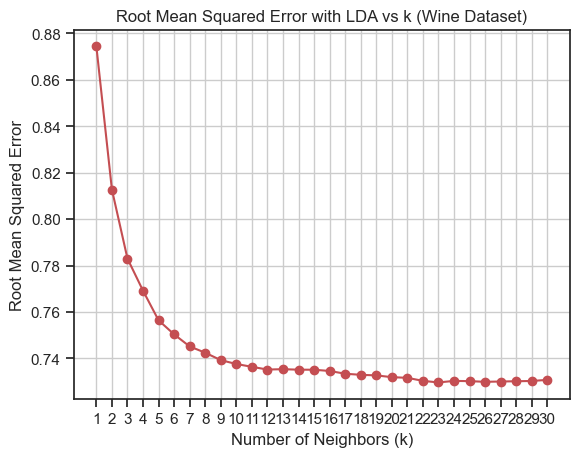

Best k Value: 23
Best RMSE Value: 0.7399022136303276
Variance of RMSE for Best k: 0.000396275929648645


In [215]:
# Create array to store k values with their mean validation accuracy (Wine)
k_values=range(1,31)
RMSE=[]
RMSE_variance=[]
for k in k_values:
    k_nearest_wine = neighbors.KNeighborsRegressor(n_neighbors=k)
    cross_val_error = cross_val_score(k_nearest_wine, wine_lda, y_train, scoring='neg_root_mean_squared_error')
    RMSE.append((-1)*cross_val_error.mean())
    RMSE_variance.append(cross_val_error.var())


# Create plot for k_values vs mean squared error (Wine)
plt.plot(k_values, RMSE, marker='o', linestyle='-', color='r')
plt.xticks(k_values)
plt.title('Root Mean Squared Error with LDA vs k (Wine Dataset)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Root Mean Squared Error')
plt.grid()
plt.show()

#Find lowest RMSE value
min_rmse = min(RMSE) 
best_k_wine = RMSE.index(min_rmse) + 1

# Root Mean Squared Error after training with best k (Wine)
k_nearest_wine_best=neighbors.KNeighborsRegressor(n_neighbors=best_k_wine)
k_nearest_wine_best.fit(wine_lda, y_train)
y_pred_wine = k_nearest_wine_best.predict(wine_lda_test)
RMSE_wine_best = root_mean_squared_error(y_test, y_pred_wine)
print(f"Best k Value: {best_k_wine}")
print(f"Best RMSE Value: {RMSE_wine_best}")
print(f"Variance of RMSE for Best k: {RMSE_variance[best_k_wine - 1]}")



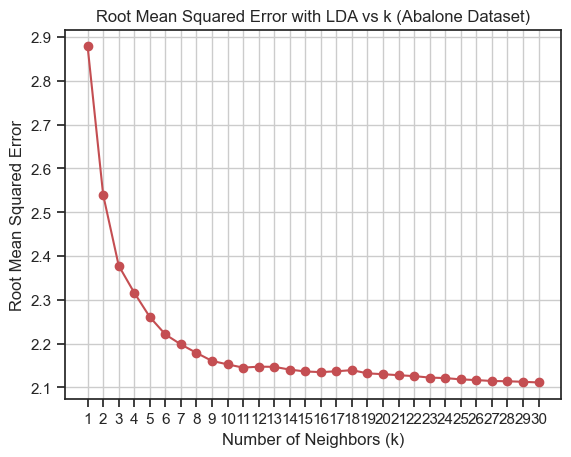

Best k value: 30
Best RMSE Value: 2.1327273735696783
Variance of RMSE for Best k: 0.008669382015559692


In [216]:
# Create array to store k values with their mean validation accuracy (Abalone)
RMSE_A = []
RMSE_variance_A = []
for k in k_values:
    k_nearest_abalone = neighbors.KNeighborsRegressor(n_neighbors=k)
    cross_val_error_A = cross_val_score(k_nearest_abalone, abalone_lda, y_train_A, scoring='neg_root_mean_squared_error')
    RMSE_A.append((-1)*cross_val_error_A.mean())
    RMSE_variance_A.append(cross_val_error_A.var())

# Create plot for k_values vs mean squared error (Abalone)
plt.plot(k_values, RMSE_A, marker='o', linestyle='-', color='r')
plt.xticks(k_values)
plt.title('Root Mean Squared Error with LDA vs k (Abalone Dataset)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Root Mean Squared Error')
plt.grid()
plt.show()

#Find lowest RMSE value with PCA and best k value (Abalone)
min_rmse_A = min(RMSE_A) 
best_k_abalone = RMSE_A.index(min_rmse_A) + 1

# Root Mean Squared Error after training with best k (Abalone)
k_nearest_abalone_best = neighbors.KNeighborsRegressor(n_neighbors=best_k_abalone)
k_nearest_abalone_best.fit(abalone_lda, y_train_A)
y_pred_abalone = k_nearest_abalone_best.predict(abalone_lda_test)
RMSE_abalone_best = root_mean_squared_error(y_test_A, y_pred_abalone)
print(f"Best k value: {best_k_abalone}")
print(f"Best RMSE Value: {RMSE_abalone_best}")
print(f"Variance of RMSE for Best k: {RMSE_variance_A[best_k_abalone - 1]}")


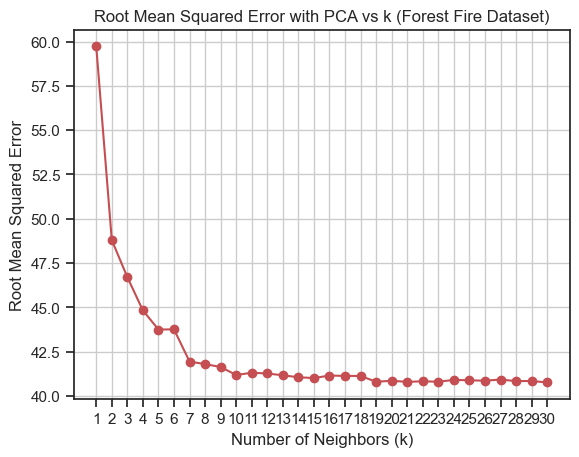

Best k value: 30
Best RMSE Value: 107.98102096970676
Variance of RMSE for Best k: 473.12333106654717


In [217]:
# Create array to store k values with their mean validation accuracy (Forest Fire)
RMSE_F = []
RMSE_variance_F = []
for k in k_values:
    k_nearest_forest = neighbors.KNeighborsRegressor(n_neighbors=k)
    cross_val_error_F = cross_val_score(k_nearest_forest, forest_lda, y_train_F, scoring='neg_root_mean_squared_error')
    RMSE_F.append((-1)*cross_val_error_F.mean())
    RMSE_variance_F.append(cross_val_error_F.var())

# Create plot for k_values vs mean squared error (Forest Fire)
plt.plot(k_values, RMSE_F, marker='o', linestyle='-', color='r')
plt.xticks(k_values)
plt.title('Root Mean Squared Error with PCA vs k (Forest Fire Dataset)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Root Mean Squared Error')
plt.grid()
plt.show()

#Find lowest RMSE value and best k value (Abalone)
min_rmse_F = min(RMSE_F) 
best_k_forest = RMSE_F.index(min_rmse_F) + 1

# Root Mean Squared Error after training with best k (Forest Fire)
k_nearest_forest_best = neighbors.KNeighborsRegressor(n_neighbors=best_k_forest)
k_nearest_forest_best.fit(forest_lda, y_train_F)
y_pred_forest = k_nearest_forest_best.predict(forest_lda_test)
RMSE_forest_best = root_mean_squared_error(y_test_F, y_pred_forest)
print(f"Best k value: {best_k_forest}")
print(f"Best RMSE Value: {RMSE_forest_best}")
print(f"Variance of RMSE for Best k: {RMSE_variance_F[best_k_forest - 1]}")

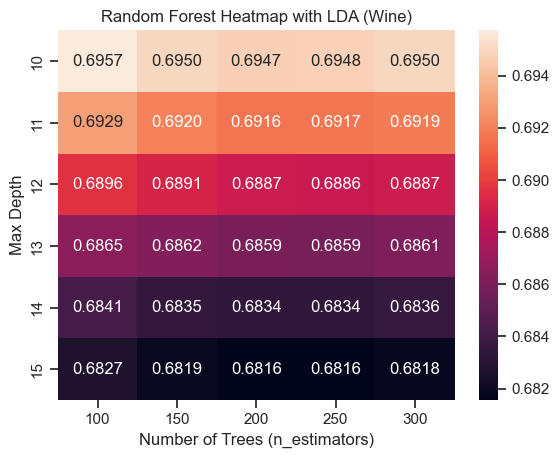

Best parameters: {'max_depth': 15, 'n_estimators': 200}
Best RMSE Value: 0.729544435139606
Variance of RMSE for Best Parameters: 0.0004137513090115411


In [12]:
# Create random forest (Wine)
random_forest = RandomForestRegressor(random_state=42)
forest_settings = {
    'n_estimators':[100,150,200,250,300],
    'max_depth':[10,11,12,13,14,15]
}
grid_search_random = GridSearchCV(random_forest, forest_settings ,scoring='neg_root_mean_squared_error')
grid_search_random.fit(wine_lda_raw, y_train_raw)

results= pd.DataFrame(grid_search_random.cv_results_)
results["mean_test_score"] = -results["mean_test_score"]

heatmap = results.pivot(index="param_max_depth", columns="param_n_estimators", values="mean_test_score")
sns.heatmap(heatmap, annot=True, fmt=".4f")

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Max Depth")
plt.title("Random Forest Heatmap with LDA (Wine)")
plt.show()

best_params_wine = grid_search_random.best_params_
std_wine = results["std_test_score"][grid_search_random.best_index_]
variance_wine = std_wine**2

random_forest_best = RandomForestRegressor(n_estimators=best_params_wine['n_estimators'], max_depth=best_params_wine['max_depth'],random_state=42)
random_forest_best.fit(wine_lda_raw, y_train_raw)
y_pred_wine = random_forest_best.predict(wine_lda_test_raw)
RMSE_wine = root_mean_squared_error(y_test_raw, y_pred_wine)

print(f"Best parameters: {best_params_wine}")
print(f"Best RMSE Value: {RMSE_wine}")
print(f"Variance of RMSE for Best Parameters: {variance_wine}")

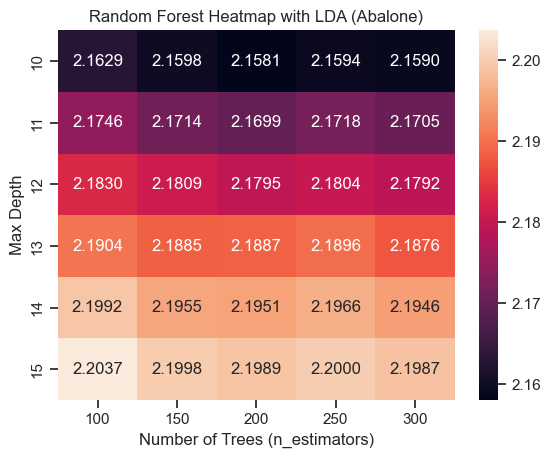

Best parameters: {'max_depth': 10, 'n_estimators': 200}
Best RMSE Value: 2.190923866533528
Variance of RMSE for Best Parameters: 0.006185626033568563


In [13]:
# Create random forest (Abalone)
random_forest_A = RandomForestRegressor(random_state=42)
forest_settings_A = {
    'n_estimators':[100,150,200,250,300],
    'max_depth':[10,11,12,13,14,15]
}
grid_search_random_A = GridSearchCV(random_forest_A, forest_settings_A ,scoring='neg_root_mean_squared_error')
grid_search_random_A.fit(abalone_lda_raw, y_train_A_raw)

results_A= pd.DataFrame(grid_search_random_A.cv_results_)
results_A["mean_test_score"] = -results_A["mean_test_score"]

heatmap_A = results_A.pivot(index="param_max_depth", columns="param_n_estimators", values="mean_test_score")
sns.heatmap(heatmap_A, annot=True, fmt=".4f")

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Max Depth")
plt.title("Random Forest Heatmap with LDA (Abalone)")
plt.show()

best_params_abalone = grid_search_random_A.best_params_
std_abalone = results_A["std_test_score"][grid_search_random_A.best_index_]
variance_abalone = std_abalone**2

random_forest_best_A = RandomForestRegressor(n_estimators=best_params_abalone['n_estimators'], max_depth=best_params_abalone['max_depth'],random_state=42)
random_forest_best_A.fit(abalone_lda_raw, y_train_A_raw)
y_pred_abalone = random_forest_best_A.predict(abalone_lda_test_raw)
RMSE_abalone = root_mean_squared_error(y_test_A_raw, y_pred_abalone)

print(f"Best parameters: {best_params_abalone}")
print(f"Best RMSE Value: {RMSE_abalone}")
print(f"Variance of RMSE for Best Parameters: {variance_abalone}")

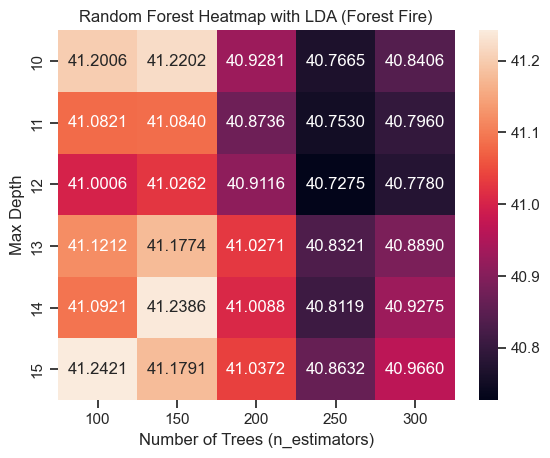

Best parameters: {'max_depth': 12, 'n_estimators': 250}
Best RMSE Value: 110.14048200281592
Variance of RMSE for Best Parameters: 322.36957917277914


In [14]:
# Create random forest (Forest Fire)
random_forest_F = RandomForestRegressor(random_state=42)
forest_settings_F = {
    'n_estimators':[100,150,200,250,300],
    'max_depth':[10,11,12,13,14,15]
}
grid_search_random_F = GridSearchCV(random_forest_F, forest_settings_F ,scoring='neg_root_mean_squared_error')
grid_search_random_F.fit(forest_lda_raw, y_train_F_raw)

results_F= pd.DataFrame(grid_search_random_F.cv_results_)
results_F["mean_test_score"] = -results_F["mean_test_score"]

heatmap_F = results_F.pivot(index="param_max_depth", columns="param_n_estimators", values="mean_test_score")
sns.heatmap(heatmap_F, annot=True, fmt=".4f")

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Max Depth")
plt.title("Random Forest Heatmap with LDA (Forest Fire)")
plt.show()

best_params_forest = grid_search_random_F.best_params_
std_forest = results_F["std_test_score"][grid_search_random_F.best_index_]
variance_forest = std_forest**2

random_forest_best_F = RandomForestRegressor(n_estimators=best_params_forest['n_estimators'], max_depth=best_params_forest['max_depth'],random_state=42)
random_forest_best_F.fit(forest_lda_raw, y_train_F_raw)
y_pred_forest = random_forest_best_F.predict(forest_lda_test_raw)
RMSE_forest = root_mean_squared_error(y_test_F_raw, y_pred_forest)

print(f"Best parameters: {best_params_forest}")
print(f"Best RMSE Value: {RMSE_forest}")
print(f"Variance of RMSE for Best Parameters: {variance_forest}")

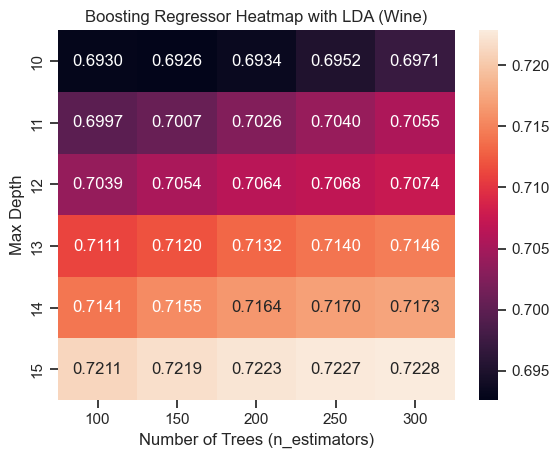

Best parameters: {'max_depth': 10, 'n_estimators': 150}
Best RMSE Value: 0.7506775001831019
Variance of RMSE for Best Parameters: 0.0004085890880804555


In [15]:
# GradientBoostingRegressor (Wine)
random_forest = GradientBoostingRegressor(random_state=42)
forest_settings = {
    'n_estimators':[100,150,200,250,300],
    'max_depth':[10,11,12,13,14,15]
}
grid_search_random = GridSearchCV(random_forest, forest_settings ,scoring='neg_root_mean_squared_error')
grid_search_random.fit(wine_lda_raw, y_train_raw)

results= pd.DataFrame(grid_search_random.cv_results_)
results["mean_test_score"] = -results["mean_test_score"]

heatmap = results.pivot(index="param_max_depth", columns="param_n_estimators", values="mean_test_score")
sns.heatmap(heatmap, annot=True, fmt=".4f")

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Max Depth")
plt.title("Boosting Regressor Heatmap with LDA (Wine)")
plt.show()

best_params_wine = grid_search_random.best_params_
std_wine = results["std_test_score"][grid_search_random.best_index_]
variance_wine = std_wine**2

random_forest_best = GradientBoostingRegressor(n_estimators=best_params_wine['n_estimators'], max_depth=best_params_wine['max_depth'],random_state=42)
random_forest_best.fit(wine_lda_raw, y_train_raw)
y_pred_wine = random_forest_best.predict(wine_lda_test_raw)
RMSE_wine = root_mean_squared_error(y_test_raw, y_pred_wine)

print(f"Best parameters: {best_params_wine}")
print(f"Best RMSE Value: {RMSE_wine}")
print(f"Variance of RMSE for Best Parameters: {variance_wine}")

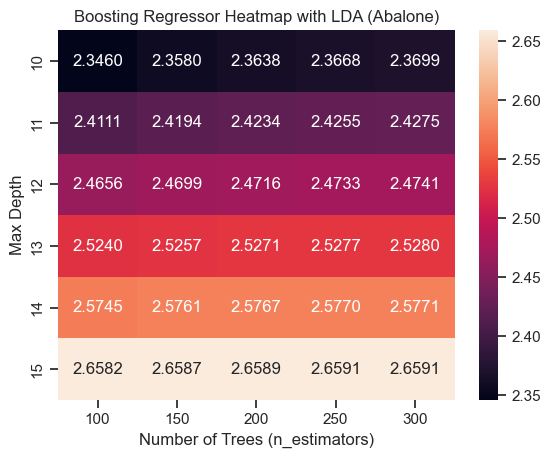

Best parameters: {'max_depth': 10, 'n_estimators': 100}
Best RMSE Value: 2.359517384965803
Variance of RMSE for Best Parameters: 0.00987957039777989


In [16]:
# GradientBoostingRegressor (Abalone)
random_forest_A = GradientBoostingRegressor(random_state=42)
forest_settings_A = {
    'n_estimators':[100,150,200,250,300],
    'max_depth':[10,11,12,13,14,15]
}
grid_search_random_A = GridSearchCV(random_forest_A, forest_settings_A ,scoring='neg_root_mean_squared_error')
grid_search_random_A.fit(abalone_lda_raw, y_train_A_raw)

results_A= pd.DataFrame(grid_search_random_A.cv_results_)
results_A["mean_test_score"] = -results_A["mean_test_score"]

heatmap_A = results_A.pivot(index="param_max_depth", columns="param_n_estimators", values="mean_test_score")
sns.heatmap(heatmap_A, annot=True, fmt=".4f")

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Max Depth")
plt.title("Boosting Regressor Heatmap with LDA (Abalone)")
plt.show()

best_params_abalone = grid_search_random_A.best_params_
std_abalone = results_A["std_test_score"][grid_search_random_A.best_index_]
variance_abalone = std_abalone**2

random_forest_best_A = GradientBoostingRegressor(n_estimators=best_params_abalone['n_estimators'], max_depth=best_params_abalone['max_depth'],random_state=42)
random_forest_best_A.fit(abalone_lda_raw, y_train_A_raw)
y_pred_abalone = random_forest_best_A.predict(abalone_lda_test_raw)
RMSE_abalone = root_mean_squared_error(y_test_A_raw, y_pred_abalone)

print(f"Best parameters: {best_params_abalone}")
print(f"Best RMSE Value: {RMSE_abalone}")
print(f"Variance of RMSE for Best Parameters: {variance_abalone}")

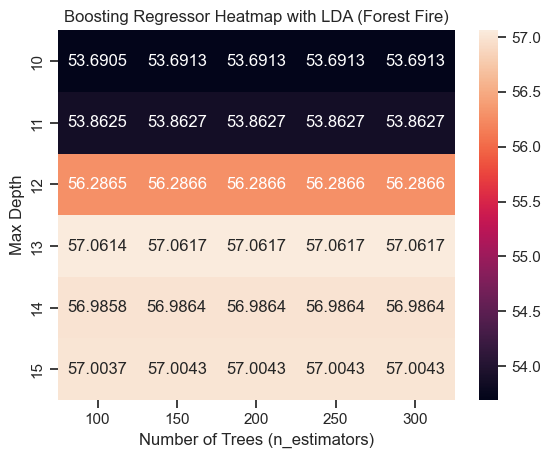

Best parameters: {'max_depth': 10, 'n_estimators': 100}
Best RMSE Value: 129.21850573428333
Variance of RMSE for Best Parameters: 473.43912790628383


In [17]:
# GradientBoostingRegressor (Forest Fire)
random_forest_F = GradientBoostingRegressor(random_state=42)
forest_settings_F = {
    'n_estimators':[100,150,200,250,300],
    'max_depth':[10,11,12,13,14,15]
}
grid_search_random_F = GridSearchCV(random_forest_F, forest_settings_F ,scoring='neg_root_mean_squared_error')
grid_search_random_F.fit(forest_lda_raw, y_train_F_raw)

results_F= pd.DataFrame(grid_search_random_F.cv_results_)
results_F["mean_test_score"] = -results_F["mean_test_score"]

heatmap_F = results_F.pivot(index="param_max_depth", columns="param_n_estimators", values="mean_test_score")
sns.heatmap(heatmap_F, annot=True, fmt=".4f")

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Max Depth")
plt.title("Boosting Regressor Heatmap with LDA (Forest Fire)")
plt.show()

best_params_forest = grid_search_random_F.best_params_
std_forest = results_F["std_test_score"][grid_search_random_F.best_index_]
variance_forest = std_forest**2

random_forest_best_F = GradientBoostingRegressor(n_estimators=best_params_forest['n_estimators'], max_depth=best_params_forest['max_depth'],random_state=42)
random_forest_best_F.fit(forest_lda_raw, y_train_F_raw)
y_pred_forest = random_forest_best_F.predict(forest_lda_test_raw)
RMSE_forest = root_mean_squared_error(y_test_F_raw, y_pred_forest)

print(f"Best parameters: {best_params_forest}")
print(f"Best RMSE Value: {RMSE_forest}")
print(f"Variance of RMSE for Best Parameters: {variance_forest}")

In [24]:
label_counts = wine[L].value_counts()
print(label_counts)

label_counts_A = abalone[R].value_counts()
print(label_counts_A)

label_counts_F = forestfires[target].value_counts()
print(label_counts_F)

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64
rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64
area   
0.00       246
1.94         3
0.90         2
28.66        2
2.18         2
          ... 
4.41         1
4.42         1
4.53         1
4.61         1
1090.84      1
Name: count, Length: 251, dtype: int64


In [4]:
print(PCA_wine)

NameError: name 'PCA_wine' is not defined